<a href="https://colab.research.google.com/github/GabeJJ388/ai-case-study/blob/main/Challenge_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the required libraries
!pip install prophet

In [3]:

# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

In [4]:

# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-4-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [5]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [6]:
# Slice the DataFrame to just the month of May 2020
df_mercado_trends_May = df_mercado_trends["2020-05-01":"2020-05-31"]

# Plot to visualize the data for May 2020
df_mercado_trends_May.plot

# Review the df_spotlight DataFrame
df_mercado_trends_May

,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53
...,...
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76


In [7]:
# Calculate the sum of the total search traffic for May 2020
total_search_traffic = df_mercado_trends_May.sum()
print(f"Total search traffic for May 2020: {total_search_traffic}")

# View the traffic_may_2020 value
total_search_traffic

Total search traffic for May 2020: Search Trends    38181
dtype: int64


,0
Search Trends,38181


In [8]:
#  Calculate the monthly median search traffic across all months
df_mercado_trends_all_months = df_mercado_trends.resample('M').median()

# View the median traffic
df_mercado_trends_all_months
# Ensure 'ds' is datetime
df_mercado_trends_all_months.index = pd.to_datetime(df_mercado_trends_all_months.index)
# Add year and month columns
df_mercado_trends_all_months['year'] = df_mercado_trends_all_months.index.year
df_mercado_trends_all_months['month'] = df_mercado_trends_all_months.index.month

# Group by year and month, summing daily traffic
monthly_traffic = df_mercado_trends_all_months.groupby(['year', 'month'])['Search Trends'].sum()
# Calculate the median of monthly traffic
median_monthly_traffic = monthly_traffic.median()
# print(f"Median monthly search traffic across all months: {median_monthly_traffic}")
median_monthly_traffic

<ipython-input-8-c6c3f25c1475>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mercado_trends_all_months = df_mercado_trends.resample('M').median()


51.0

In [19]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median
traffic_may_2020 = df_mercado_trends_May.sum()
traffic_may_2020

traffic_may_2020_vs_median = traffic_may_2020 - median_monthly_traffic
traffic_may_2020_vs_median


,0
Search Trends,38130.0


In [20]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df_mercado_trends_all_days = df_mercado_trends.resample('D').mean()
df_mercado_trends_all_days


,Search Trends
Date,
2016-06-01,47.291667
2016-06-02,48.375000
2016-06-03,47.750000
2016-06-04,45.625000
2016-06-05,43.875000
...,...
2020-09-04,47.291667
2020-09-05,45.875000
2020-09-06,45.416667


In [21]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
df_mercado_trends_all_days['day_of_week'] = df_mercado_trends_all_days.index.day
df_mercado_trends_all_days

,Search Trends,day_of_week
Date,,
2016-06-01,47.291667,1
2016-06-02,48.375000,2
2016-06-03,47.750000,3
2016-06-04,45.625000,4
2016-06-05,43.875000,5
...,...,...
2020-09-04,47.291667,4
2020-09-05,45.875000,5
2020-09-06,45.416667,6


In [22]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df_mercado_trends_all_weeks = df_mercado_trends.resample('W').mean()
df_mercado_trends_all_weeks

,Search Trends
Date,
2016-06-05,46.583333
2016-06-12,46.416667
2016-06-19,44.142857
2016-06-26,46.744048
2016-07-03,46.071429
...,...
2020-08-16,49.666667
2020-08-23,49.886905
2020-08-30,32.565476


In [23]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

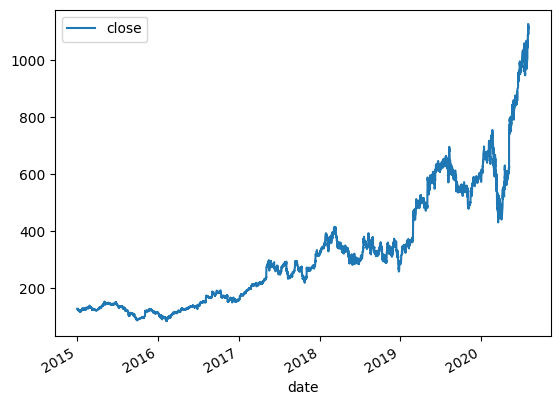

In [24]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [25]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
df_mercado_stock_trends = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)

# View the first and last five rows of the DataFrame
display(df_mercado_stock_trends.head())
display(df_mercado_stock_trends.tail())

# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_stock_trends = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
df_mercado_stock_trends.head()
df_mercado_stock_trends.tail()

,close,Search Trends
2015-01-02 09:00:00,127.67,NaN
2015-01-02 10:00:00,125.44,NaN
2015-01-02 11:00:00,125.57,NaN
2015-01-02 12:00:00,125.40,NaN
2015-01-02 13:00:00,125.17,NaN


,close,Search Trends
2020-09-07 20:00:00,NaN,71.0
2020-09-07 21:00:00,NaN,83.0
2020-09-07 22:00:00,NaN,96.0
2020-09-07 23:00:00,NaN,97.0
2020-09-08 00:00:00,NaN,96.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


In [26]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_mercado_stock_trends["2020-01-01":"2020-06-30"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


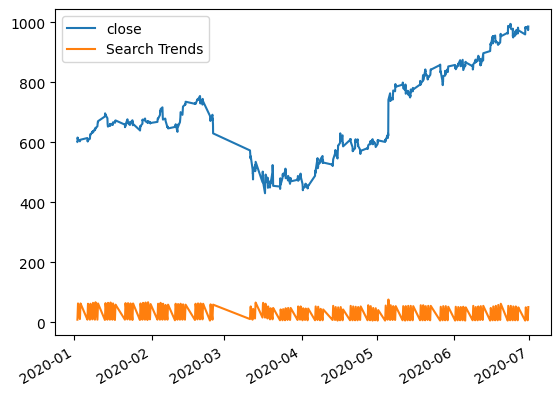

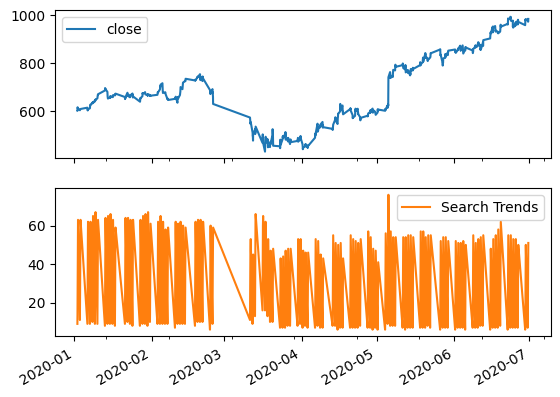

In [27]:
# Visualize the close and Search Trends data
visualize_data = first_half_2020.plot()
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
plot_data = first_half_2020.plot(subplots=True)

In [35]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
mercado_stock_trends_df= df_mercado_stock_trends
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(periods=1)
# This column should shift the Search Trends information by one hour
shift_search_trends = mercado_stock_trends_df['Search Trends'].shift(periods=1)
# View the first and last five rows of the new DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends,Stock Volatility,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,NaN,6.0
2016-06-01 11:00:00,136.56,22.0,NaN,12.0
2016-06-01 12:00:00,136.42,33.0,0.693848,22.0
2016-06-01 13:00:00,136.10,40.0,0.235142,33.0


,close,Search Trends,Stock Volatility,Lagged Search Trends
2020-07-31 11:00:00,1105.780,20.0,7.495900,11.0
2020-07-31 12:00:00,1087.925,32.0,12.188462,20.0
2020-07-31 13:00:00,1095.800,41.0,7.393646,32.0
2020-07-31 14:00:00,1110.650,47.0,10.169735,41.0
2020-07-31 15:00:00,1122.510,53.0,15.408790,47.0


In [29]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
df_mercado_stock_trends['Stock Volatility'] = df_mercado_stock_trends['close'].rolling(window=4).std()
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
rolling_std = df_mercado_stock_trends['close'].rolling(window=4).std()
# View the first and last five rows of the new DataFrame
display(df_mercado_stock_trends.head())
display(df_mercado_stock_trends.tail())


,close,Search Trends,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,NaN
2016-06-01 11:00:00,136.56,22.0,NaN
2016-06-01 12:00:00,136.42,33.0,0.693848
2016-06-01 13:00:00,136.10,40.0,0.235142


,close,Search Trends,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,7.495900
2020-07-31 12:00:00,1087.925,32.0,12.188462
2020-07-31 13:00:00,1095.800,41.0,7.393646
2020-07-31 14:00:00,1110.650,47.0,10.169735
2020-07-31 15:00:00,1122.510,53.0,15.408790


<Axes: >

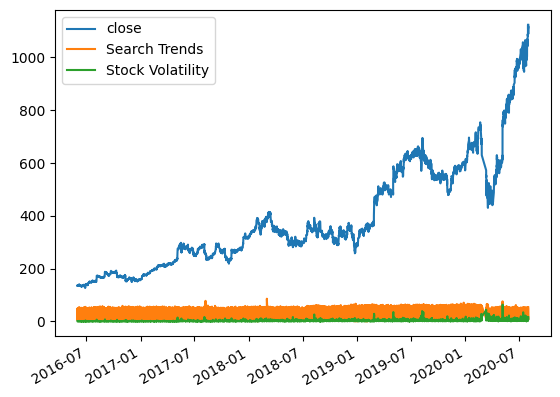

In [31]:
# Visualize the stock volatility
df_mercado_stock_trends.plot()



In [36]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()
# This column should calculate hourly return percentage of the closing price
hourly_return = mercado_stock_trends_df['close'].pct_change()
# View the first and last five rows of the new DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())



,close,Search Trends,Stock Volatility,Lagged Search Trends,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,NaN,6.0,0.010876
2016-06-01 11:00:00,136.56,22.0,NaN,12.0,-0.000512
2016-06-01 12:00:00,136.42,33.0,0.693848,22.0,-0.001025
2016-06-01 13:00:00,136.10,40.0,0.235142,33.0,-0.002346


,close,Search Trends,Stock Volatility,Lagged Search Trends,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,7.495900,11.0,0.006380
2020-07-31 12:00:00,1087.925,32.0,12.188462,20.0,-0.016147
2020-07-31 13:00:00,1095.800,41.0,7.393646,32.0,0.007239
2020-07-31 14:00:00,1110.650,47.0,10.169735,41.0,0.013552
2020-07-31 15:00:00,1122.510,53.0,15.408790,47.0,0.010678


In [37]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends,Stock Volatility,Lagged Search Trends,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,NaN,6.0,0.010876
2016-06-01 11:00:00,136.56,22.0,NaN,12.0,-0.000512
2016-06-01 12:00:00,136.42,33.0,0.693848,22.0,-0.001025
2016-06-01 13:00:00,136.10,40.0,0.235142,33.0,-0.002346


,close,Search Trends,Stock Volatility,Lagged Search Trends,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,7.495900,11.0,0.006380
2020-07-31 12:00:00,1087.925,32.0,12.188462,20.0,-0.016147
2020-07-31 13:00:00,1095.800,41.0,7.393646,32.0,0.007239
2020-07-31 14:00:00,1110.650,47.0,10.169735,41.0,0.013552
2020-07-31 15:00:00,1122.510,53.0,15.408790,47.0,0.010678


In [38]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.118945,0.046723
Lagged Search Trends,-0.118945,1.000000,0.017929
Hourly Stock Return,0.046723,0.017929,1.000000


In [46]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
if 'DateTime' in df_mercado_trends.columns:
    df_mercado_trends = df_mercado_trends.reset_index()


# Use the drop function to drop the Date column

mercado_stock_trends_df = mercado_stock_trends_df.drop(columns=['Date'])


# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_stock_trends_df.columns = ['ds', 'y']


# Drop an NaN values from the prophet_df DataFrame
mercado_stock_trends_df = mercado_stock_trends_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


KeyError: "['Date'] not found in axis"

In [40]:
# Call the Prophet function, store as an object
model = Prophet()

In [47]:
# Fit the time-series model.

model.fit(mercado_stock_trends_df)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [48]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

Exception: Model has not been fit.

In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()


# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_mercado_trends)

In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()

In [ ]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
model.plot(forecast_mercado_trends)


In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
reset_forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig2 = model.plot_components(forecast_mercado_trends)


# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
fig2 = model.plot_components(forecast_mercado_trends)
